In [1]:
library(caret)
library(dplyr)
options(warn = -1)
library(nnet)
library(e1071)
library(randomForest)
library(party)
# library(NbClust)
library(class)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [2]:
서울대전앞뒤2일 <- read.csv('../Data_Project/alldata.csv', fileEncoding = "utf-8")[,-c(5:9)]
서울대전앞뒤2일[,1] <- as.Date(서울대전앞뒤2일[,1])
head(서울대전앞뒤2일)


날짜,일차,출발시간,소요시간
2013-02-08,0,0,91
2013-02-09,1,0,132
2013-02-10,2,0,83
2013-02-11,3,0,87
2013-02-12,4,0,84
2013-02-08,0,1,88


In [3]:
sum <- 0

for (i in 1:100){
  samp <- createDataPartition(서울대전앞뒤2일$소요시간, p=0.7, list=F)
  data.tr <- 서울대전앞뒤2일[samp,]
  data.test <- 서울대전앞뒤2일[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.85 < y) & (pred_rf*1.15 > y)) 
  sum <- sum + 예측력_rf
}

sum

[1] 81.74035

In [4]:
## 다 : 66.8
## 1:4 : 68.3

In [5]:
sd22 <- read.csv("../Data_Project/진짜최종.csv", fileEncoding = "UTF-8")

head(sd22)
nrow(sd22)

소요시간,일차,출발시간,연휴길이
91,0,0,3
88,0,1,3
88,0,2,3
87,0,3,3
91,0,4,3
97,0,5,3


[1] 1008

In [6]:
sum <- 0

for (i in 1:100){
  samp <- createDataPartition(sd22$소요시간, p=0.7, list=F)
  data.tr <- sd22[samp,]
  data.test <- sd22[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.80< y) & (pred_rf*1.2 > y)) 
  sum <- sum + 예측력_rf
}

sum

[1] 83.49333

In [7]:
sdTime <- aggregate(소요시간 ~ 출발시간, sd22, mean)
sdTime

출발시간,소요시간
0,94.14286
1,93.76190
2,94.45238
3,95.54762
4,94.47619
5,95.47619
6,96.69048
7,98.02381
8,97.64286
9,99.69048


In [8]:
table(sd22$일차)


  0   1   2   3   4   5 
192 192 192 192 168  72 

In [9]:
sd222 <- read.csv("../Data_Project/진짜최종_날짜포함.csv", fileEncoding = "utf-8")

In [10]:
head(sd222)

소요시간,일차,출발시간,연휴길이,날짜
91,0,0,2013,2013-02-08
88,1,0,2013,2013-02-08
88,2,0,2013,2013-02-08
87,3,0,2013,2013-02-08
91,4,0,2013,2013-02-08
97,5,0,2013,2013-02-08


In [11]:
popCar <- read.csv("../Data_Project/인구수자동차수.csv", fileEncoding = "utf-8")
popCar

X,년도,서울인구수,승용차,승합차,차합계
1,2013,10388055,2462515,156871,2619386
6,2014,10369593,2510742,149991,2660733
11,2015,10297138,2560154,141927,2702081
16,2016,10204057,2598344,134309,2732653
21,2017,10124579,2641190,127564,2768754
26,2018,10049607,2658637,120780,2779417
31,2019,10010983,2670803,114310,2785113
37,2020,9911088,2711984,106504,2818488


In [12]:
nrow(sd222)

[1] 1056

In [13]:
table(sd222$일차)


 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 

In [14]:
table(sd222$출발시간)


  0   1   2   3   4   5   6 
192 192 192 192 192  72  24 

In [15]:
sd555 <- read.csv("../Data_Project/AI프로젝트22.csv", fileEncoding = 'utf-8')

In [16]:
sd555 <- sd555[,-5]
sd12 <- sd555[,6:8]
head(sd12)
sd12 <- scale(sd12)
head(sd12)

X1종.교통량,X2종.교통량,서울인구수
3793419,229419,10388055
2514790,203047,10388055
1846564,235137,10388055
1632415,305994,10388055
2247045,444384,10388055
5186824,774325,10388055


X1종.교통량,X2종.교통량,서울인구수
-0.7736980,-0.7304996,1.406826
-0.8754301,-0.7805927,1.406826
-0.9285965,-0.7196384,1.406826
-0.9456349,-0.5850469,1.406826
-0.8967328,-0.3221779,1.406826
-0.6628339,0.3045384,1.406826


In [17]:
sdScale <- cbind(sd555[,1:5], sd12)

In [18]:
nrow(sd555)
head(sd555)
head(sdScale)

[1] 1008

소요시간,출발시간,일차,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
91,0,0,3,TRUE,3793419,229419,10388055
88,1,0,3,TRUE,2514790,203047,10388055
88,2,0,3,TRUE,1846564,235137,10388055
87,3,0,3,TRUE,1632415,305994,10388055
91,4,0,3,TRUE,2247045,444384,10388055
97,5,0,3,TRUE,5186824,774325,10388055


소요시간,출발시간,일차,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
91,0,0,3,TRUE,-0.7736980,-0.7304996,1.406826
88,1,0,3,TRUE,-0.8754301,-0.7805927,1.406826
88,2,0,3,TRUE,-0.9285965,-0.7196384,1.406826
87,3,0,3,TRUE,-0.9456349,-0.5850469,1.406826
91,4,0,3,TRUE,-0.8967328,-0.3221779,1.406826
97,5,0,3,TRUE,-0.6628339,0.3045384,1.406826


In [19]:
sum_rf <- 0
# sum_nnet <- 0
sum_ctree <- 0
# sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0

for (i in 1:100){
  samp <- createDataPartition(sdScale$소요시간, p=0.7, list=F)
  data.tr <- sdScale[samp,]
  data.test <- sdScale[-samp,]
    
  # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간)
  y_tr <- data.tr$소요시간
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간)
  y_test <- data.test$소요시간
    
  # RF
  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean((pred_rf*0.85 < y_test) & (pred_rf*1.15 > y_test)) 
  # RF train
  model_rf_tr <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean((pred_rf_tr*0.85 < y_tr) & (pred_rf_tr*1.15 > y_tr))

  
  # 인공신경망
  # model_nnet <- nnet(소요시간 ~ ., data=data.tr, size=3)
  # pred_nnet <- predict(model_nnet, x, type="class")
  # 예측력_nnet <- mean((pred_nnet*0.85 < y) & (pred_nnet*1.15 > y)) 
 
  # 의사결정나무
  model_ctree <- ctree(소요시간 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean((pred_ctree*0.85 < y_test) & (pred_ctree*1.15 > y_test))
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean((pred_ctree_tr*0.85 < y_tr) & (pred_ctree_tr*1.15 > y_tr))
    
  # SVM test
  model_svm <- svm(소요시간 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean((pred_svm*0.85 < y_test) & (pred_svm*1.15 > y_test))
  # SVM train
   model_svm_tr <- svm(소요시간 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean((pred_svm_tr*0.85 < y_tr) & (pred_svm_tr*1.15 > y_tr))
    
  # 다항 로지스틱 회귀분석
  # model_multinom <- multinom(소요시간 ~ ., data=data.tr)
  # pred_multinom <- predict(model_multinom, x, type="class")
  # 예측력_multinom <- mean((pred_multinom*0.85 < y) & (pred_multinom*1.15 > y)) 
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  # sum_multi <- sum_multi + 예측력_multinom
  # sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
}

sum_rf
sum_ctree
sum_svm
# sum_multi
# sum_ctree

sum_rf_tr
sum_ctree_tr
sum_svm_tr

[1] 74.92333

[1] 61.89667

[1] 75.21

[1] 90.29802

[1] 64.33192

[1] 77.60169

In [20]:
nrow(sd555)

[1] 1008

In [21]:
# 정확도
r <- 0

# for (i in 1:100){
samp <- createDataPartition(sdScale$소요시간, p=0.7, list=F)
  data.tr <- sdScale[samp,]
  data.test <- sdScale[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간
    
  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.85 < y) & (pred_rf*1.15 > y)) 
  r <- 1 - sum((y - pred_rf)^2) / sum((y - mean(y))^2)
    
# }   
r

[1] 0.663011

In [22]:
library(Metrics)


Attaching package: ‘Metrics’

The following objects are masked from ‘package:caret’:

    precision, recall



In [23]:
kmeans(sdScale$출발시간, 3)

K-means clustering with 3 clusters of sizes 336, 378, 294

Cluster means:
  [,1]
1 10.5
2 19.0
3  3.0

Clustering vector:
   [1] 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1
  [38] 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3
  [75] 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1
 [112] 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3
 [149] 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2
 [186] 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 [223] 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2
 [260] 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1
 [297] 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 [334] 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1
 [371] 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2

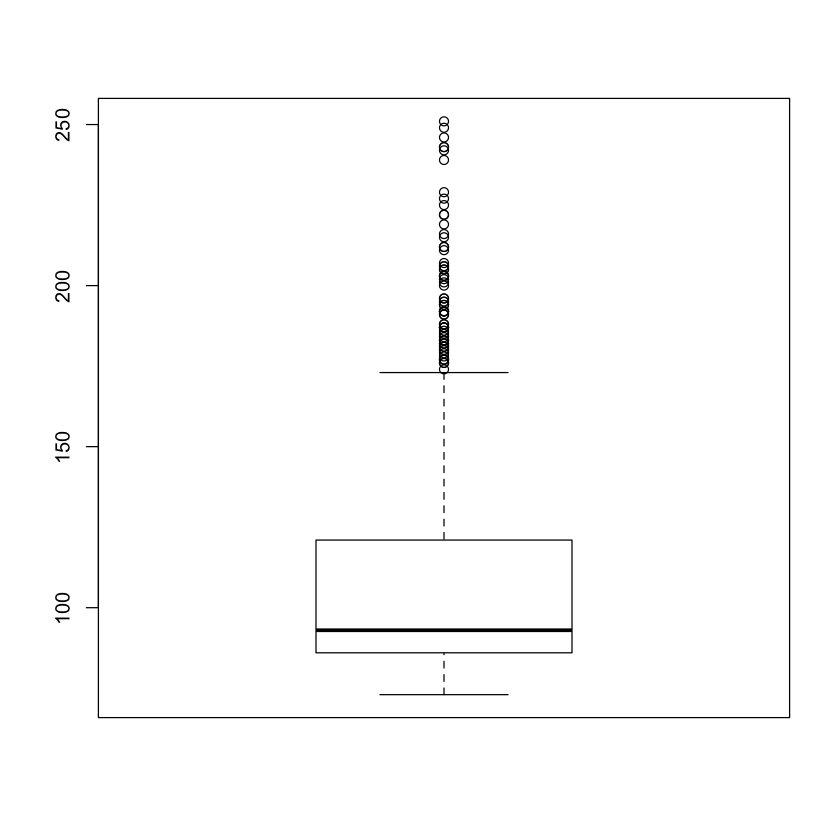

In [24]:
boxplot(sdScale$소요시간)

In [25]:
table(sdScale$일차)


  0   1   2   3   4   5 
192 192 192 192 168  72 

In [26]:
# 일차별 데이터셋 분류
sd1 <- subset(sdScale, 일차 == 0)
sd2 <- subset(sdScale, 일차 == 1)
sd3 <- subset(sdScale, 일차 == 2)
sd4 <- subset(sdScale, 일차 == 3)
sd5 <- subset(sdScale, 일차 == 4)
sd6 <- subset(sdScale, 일차 == 5)

In [27]:
kmeans(sd1$소요시간, 3)

K-means clustering with 3 clusters of sizes 34, 44, 114

Cluster means:
       [,1]
1 197.00000
2 129.86364
3  89.23684

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 2 2 2 2 2 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 1 1 1 1 1 1 1 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2
[112] 2 2 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 1 2 1 1 1 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2
[186] 2 2 2 1 1 1 1

Within cluster sum of squares by cluster:
[1] 21062.000 10031.182  5568.605
 (between_SS / total_SS =  89.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [28]:
kmeans(sd2$소요시간, 3)

K-means clustering with 3 clusters of sizes 74, 30, 88

Cluster means:
      [,1]
1 151.1351
2 200.4333
3 105.4432

Clustering vector:
  [1] 1 1 3 3 3 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 2 2 2 2
 [38] 2 2 2 1 1 1 1 3 3 3 3 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 1 1 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 3 1 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1
[186] 1 1 3 3 3 3 3

Within cluster sum of squares by cluster:
[1] 11964.65 11557.37 14647.72
 (between_SS / total_SS =  85.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [29]:
kmeans(sd3$소요시간, 3)

K-means clustering with 3 clusters of sizes 98, 37, 57

Cluster means:
       [,1]
1  90.65306
2 155.94595
3 116.54386

Clustering vector:
  [1] 1 1 1 1 1 3 1 1 1 1 1 1 1 3 3 3 3 2 2 2 2 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 3 3 3 2 3 2 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 2 2 2 2 2 2 2 2 2 1 1
 [75] 1 1 1 1 1 1 1 3 1 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
[112] 2 2 2 2 2 2 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 2 2 2 2 3 3 3 1 1 1 1 1
[149] 1 1 1 3 1 1 3 3 3 3 3 2 3 2 2 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 2
[186] 2 2 2 3 3 3 1

Within cluster sum of squares by cluster:
[1]  4174.204 10125.892  5112.140
 (between_SS / total_SS =  85.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [30]:
kmeans(sd4$소요시간, 3)

K-means clustering with 3 clusters of sizes 146, 38, 8

Cluster means:
       [,1]
1  87.05479
2 104.63158
3 168.50000

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 3 3 3 3 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
[186] 2 2 2 1 1 1 1

Within cluster sum of squares by cluster:
[1] 2967.562 3334.842 3400.000
 (between_SS / total_SS =  85.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [31]:
kmeans(sd5$소요시간, 3)

K-means clustering with 3 clusters of sizes 79, 10, 79

Cluster means:
       [,1]
1  82.46835
2 124.90000
3  91.46835

Clustering vector:
  [1] 1 1 1 1 1 3 1 1 1 1 1 1 3 3 3 3 3 3 3 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 3 3 3 1 1 1 1 1 1 3 3 3 3 3 3 1 1 3 1 1 1 3
 [75] 3 3 3 3 3 1 1 3 1 3 1 1 3 3 3 3 3 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 3 3 1 1 3 1
[149] 1 1 1 1 1 1 1 1 1 1 3 3 1 3 3 3 3 3 3 3

Within cluster sum of squares by cluster:
[1]  469.6709 1208.9000 1055.6709
 (between_SS / total_SS =  86.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [32]:
kmeans(sd6$소요시간, 3)

K-means clustering with 3 clusters of sizes 21, 15, 36

Cluster means:
      [,1]
1 78.66667
2 92.60000
3 85.02778

Clustering vector:
 [1] 3 1 1 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 2 2 2 1 1 1 1 3 3 3 3 3 3 3
[39] 3 2 2 3 3 3 3 3 3 3 1 1 1 1 2 1 1 1 1 1 1 1 3 3 2 2 2 2 2 2 2 2 2 3

Within cluster sum of squares by cluster:
[1] 112.6667 103.6000 110.9722
 (between_SS / total_SS =  83.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [33]:
# 출발시간별 데이터셋 분류
sd <- subset(sdScale, 출발시간 == 0)

In [34]:
kmeans(subset(sdScale, 출발시간 == 0)$소요시간, 3)

K-means clustering with 3 clusters of sizes 1, 36, 5

Cluster means:
       [,1]
1 219.00000
2  84.72222
3 137.00000

Clustering vector:
 [1] 2 3 2 2 2 3 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
[39] 3 2 2 2

Within cluster sum of squares by cluster:
[1]    0.000 1105.222 1090.000
 (between_SS / total_SS =  92.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [35]:
table(sdScale$소요시간)


 73  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93 
  1   4   3   4   8  19  23  29  32  29  42  38  34  48  32  41  31  31  29  38 
 94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 
 26  17  12  14   9  13   8   7  15   8  11   7   6   8   7   3   6   9  10   6 
114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 
  6   4   4   5   9   4   2   7   3   5   6   5   2   7   4   6   1   4   2   9 
134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 
  3   2   2   2   2   7   1   4   4   4   8   4   4   4   5   5   5   1   3   3 
154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 
  3   4   5   3   4   1   5   1   3   2   2   3   3   3   3   1   3   2   2   1 
174 176 177 178 179 180 181 182 183 184 185 186 187 188 191 192 194 195 196 200 
  1   2   3   1   1   2   2   2   3   1   2   1   4   2   2   4   2   2   2   1 
201 202 203 205 206 207 211

In [36]:
library(dplyr)
sdScaleArr <- arrange(sdScale, 소요시간)

In [37]:
nrow(sdScaleArr[sdScaleArr$소요시간 <= 84,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 84 & sdScaleArr$소요시간 <= 89,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 89 & sdScaleArr$소요시간 <= 113,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 114 & sdScaleArr$소요시간 <= 173,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 173,])


[1] 194

[1] 193

[1] 331

[1] 216

[1] 68

In [38]:
sd일차 <- read.csv("../Data_Project/일단최종6월13일.csv")
head(sd일차)
nrow(sd일차)

소요시간,출발시간,일차,연휴길이,날짜,눈비,X1종.교통량,X2종.교통량,서울인구수,디데이
91,0,0,3,2013-02-08,TRUE,3793419,229419,10388055,전전날
88,1,0,3,2013-02-08,TRUE,2514790,203047,10388055,전전날
88,2,0,3,2013-02-08,TRUE,1846564,235137,10388055,전전날
87,3,0,3,2013-02-08,TRUE,1632415,305994,10388055,전전날
91,4,0,3,2013-02-08,TRUE,2247045,444384,10388055,전전날
97,5,0,3,2013-02-08,TRUE,5186824,774325,10388055,전전날


[1] 432

In [39]:
sd일차0 <- subset(sd일차, 일차 == 0)
nrow(sd일차0)
sd일차1 <- subset(sd일차, 일차 == 1)
nrow(sd일차1)
sd일차2 <- subset(sd일차, 일차 == 2)
nrow(sd일차2)

[1] 144

[1] 144

[1] 144

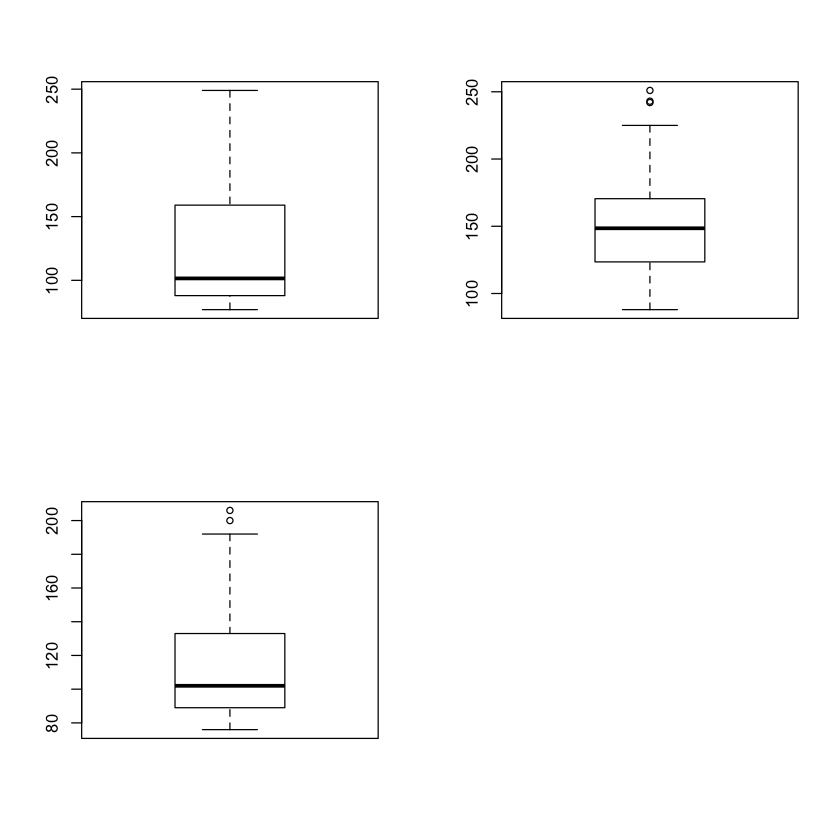

In [40]:
par(mfrow = c(2,2))
boxplot(sd일차0$소요시간)
boxplot(sd일차1$소요시간)
boxplot(sd일차2$소요시간)

In [41]:
# 

sdd2 <- read.csv("../Data_Project/AI프로젝트 - D-2-2.csv")
sdd1 <- read.csv("../Data_Project/AI프로젝트 - D-1.csv")

table(sdd2$소요시간범위)
table(sdd1$소요시간범위)

sdd2Scale <- sdd2[,6:8]

sdd2Scale <- scale(sdd2Scale)
head(sdd2Scale)

sdd2 <- sdd2[,-c(4,9)]
sdd1 <- sdd1[,-c(4,9)]
head(sdd2)
head(sdd1)
sdd2Scale <- cbind(sdd2[,1:4], sdd2Scale)
head(sdd2Scale)
head(sdd1[,c(1:6)])


 A  B  C  D 
35 37 36 36 


 A  B  C  D 
37 38 31 38 

X1종.교통량,X2종.교통량,서울인구수
-0.8192102,-0.86871839,1.124724
-0.9097371,-0.91451260,1.124724
-0.9570474,-0.85878925,1.124724
-0.9722092,-0.73574812,1.124724
-0.9286934,-0.49543791,1.124724
-0.7205572,0.07749504,1.124724


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
B,0,3,TRUE,3793419,229419,10388055
B,1,3,TRUE,2514790,203047,10388055
B,2,3,TRUE,1846564,235137,10388055
A,3,3,TRUE,1632415,305994,10388055
B,4,3,TRUE,2247045,444384,10388055
B,5,3,TRUE,5186824,774325,10388055


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
B,0,3,TRUE,3793419,229419,10388055
B,1,3,TRUE,2514790,203047,10388055
A,2,3,TRUE,1846564,235137,10388055
A,3,3,TRUE,1632415,305994,10388055
A,4,3,TRUE,2247045,444384,10388055
A,5,3,TRUE,5186824,774325,10388055


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
B,0,3,TRUE,-0.8192102,-0.86871839,1.124724
B,1,3,TRUE,-0.9097371,-0.91451260,1.124724
B,2,3,TRUE,-0.9570474,-0.85878925,1.124724
A,3,3,TRUE,-0.9722092,-0.73574812,1.124724
B,4,3,TRUE,-0.9286934,-0.49543791,1.124724
B,5,3,TRUE,-0.7205572,0.07749504,1.124724


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량
B,0,3,TRUE,3793419,229419
B,1,3,TRUE,2514790,203047
A,2,3,TRUE,1846564,235137
A,3,3,TRUE,1632415,305994
A,4,3,TRUE,2247045,444384
A,5,3,TRUE,5186824,774325


In [62]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

  samp <- createDataPartition(sdd2[,c(1:4,6)]$소요시간범위, p=0.7, list=F)
  data.tr <- sdd2[,c(1:4,6)][samp,]
  data.test <- sdd2[,c(1:4,6)][-samp,]
    
  # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위

for (i in 1:5){
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)
  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet <- predict(model_nnet, x_test, type="class")
  예측력_nnet <- mean(pred_nnet == y_test)
  # 인공신경망 train
  model_nnet_tr <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
  예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
   model_multinom <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
   pred_multinom <- predict(model_multinom, x_test, type="class")
   예측력_multinom <- mean(pred_multinom == y_test)
  # 다항 로지스틱 회귀분석 train
    model_multinom_tr <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
    pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
    예측력_multinom_tr <- mean(pred_multinom_tr == y_tr)
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf/5, "\n")
cat("의사결정나무 : ", sum_ctree/5, "\n")
cat("SVM :  ", sum_svm/5, "\n")
cat("다항 로지스틱 :  ", sum_multi/5, "\n")
cat("인공신경망 :  ", sum_nnet/5, "\n")
# sum_ctree
cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr/5, "\n")
cat("의사결정나무 : ", sum_ctree_tr/5, "\n")
cat("SVM :  ", sum_svm_tr/5, "\n")
cat("다항 로지스틱 :  ", sum_multi_tr/5, "\n")
cat("인공신경망 :  ", sum_nnet_tr/5, "\n")

Test Data 
랜덤 포레스트 :  0.7902439 
의사결정나무 :  0.6585366 
SVM :   0.7804878 
다항 로지스틱 :   0.8780488 
인공신경망 :   0.6585366 
------------------------ 
Training Data 
랜덤 포레스트 :  1 
의사결정나무 :  0.7087379 
SVM :   0.8543689 
다항 로지스틱 :   0.8737864 
인공신경망 :   0.2427184 


In [43]:
popCar <- read.csv("../Data_Project/인구수자동차수.csv")

In [44]:
popCar

X,년도,서울인구수,승용차,승합차,차합계
1,2013,10388055,2462515,156871,2619386
6,2014,10369593,2510742,149991,2660733
11,2015,10297138,2560154,141927,2702081
16,2016,10204057,2598344,134309,2732653
21,2017,10124579,2641190,127564,2768754
26,2018,10049607,2658637,120780,2779417
31,2019,10010983,2670803,114310,2785113
37,2020,9911088,2711984,106504,2818488


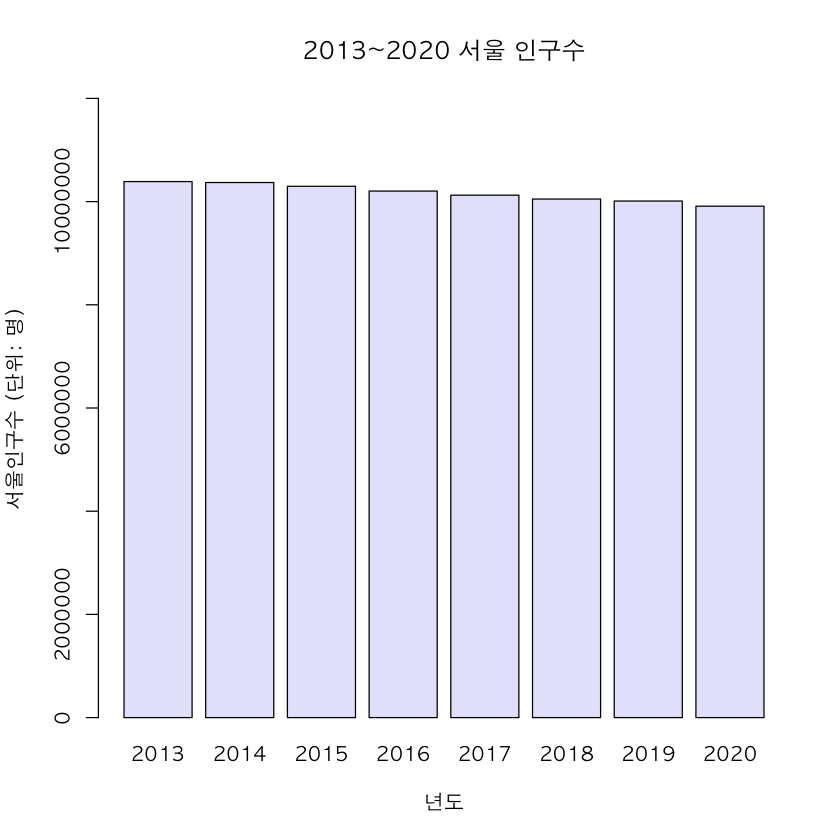

In [45]:
par(family = "AppleGothic")
options(scipen = 100)

barplot(
    popCar$서울인구수,
    type = 'o',
    main = '2013~2020 서울 인구수',
    ylim = c(0, 12000000),
    ylab = c('서울인구수 (단위: 명)'),
    xlab = c('년도'),
    names = popCar$년도,
    col= 'lavender',
    
)

In [97]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

samp <- createDataPartition(sdd2[,1:4]$소요시간범위, p=0.7, list=F)
data.tr <- sdd2[,1:4][samp,]
data.test <- sdd2[,1:4][-samp,]

for (i in 1:100){
   # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위  
    
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)
  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet <- predict(model_nnet, x_test, type="class")
  예측력_nnet <- mean(pred_nnet == y_test)
  # 인공신경망 train
  model_nnet_tr <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
  예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
   model_multinom <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
   pred_multinom <- predict(model_multinom, x_test, type="class")
   예측력_multinom <- mean(pred_multinom == y_test)
  # 다항 로지스틱 회귀분석 train
    model_multinom_tr <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
    pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
    예측력_multinom_tr <- mean(pred_multinom_tr == y_tr)
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf, "\n")
cat("의사결정나무 : ", sum_ctree, "\n")
cat("SVM :  ", sum_svm, "\n")
cat("다항 로지스틱 :  ", sum_multi, "\n")
cat("인공신경망 :  ", sum_nnet, "\n")
# sum_ctree
cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr, "\n")
cat("의사결정나무 : ", sum_ctree_tr, "\n")
cat("SVM :  ", sum_svm_tr, "\n")
cat("다항 로지스틱 :  ", sum_multi_tr, "\n")
cat("인공신경망 :  ", sum_nnet_tr, "\n")

Test Data 
랜덤 포레스트 :  78.39024 
의사결정나무 :  78.04878 
SVM :   75.60976 
다항 로지스틱 :   78.04878 
인공신경망 :   78.04878 
------------------------ 
Training Data 
랜덤 포레스트 :  81.38835 
의사결정나무 :  80.58252 
SVM :   80.58252 
다항 로지스틱 :   82.52427 
인공신경망 :   82.04854 


In [ ]:
# 기본

Test Data 
랜덤 포레스트 :  75.53659 
의사결정나무 :  65.85366 
SVM :   75.60976 
다항 로지스틱 :   75.60976 
인공신경망 :   65.85366 
------------------------ 
Training Data 
랜덤 포레스트 :  84.87379 
의사결정나무 :  72.81553 
SVM :   80.58252 
다항 로지스틱 :   74.75728 
인공신경망 :   78.73786 

가장 높은 모델 : SVM
=============================

Test Data 
랜덤 포레스트 :  75.2439 
의사결정나무 :  70.73171 
SVM :   75.60976 
다항 로지스틱 :   73.17073 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  85.30097 
의사결정나무 :  71.84466 
SVM :   82.52427 
다항 로지스틱 :   76.69903 
인공신경망 :   76.58252 

가장 높은 모델 : SVM
==============================

Test Data 
랜덤 포레스트 :  73.31707 
의사결정나무 :  70.73171 
SVM :   73.17073 
다항 로지스틱 :   78.04878 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  86.99029 
의사결정나무 :  70.87379 
SVM :   83.49515 
다항 로지스틱 :   75.72816 
인공신경망 :   80.40777 

가장 높은 모델 : 다항 로지스틱 78.04878 
==============================

Test Data 
랜덤 포레스트 :  77.82927 
의사결정나무 :  70.73171 
SVM :   75.60976 
다항 로지스틱 :   70.73171 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  83.97087 
의사결정나무 :  70.87379 
SVM :   84.46602 
다항 로지스틱 :   77.6699 
인공신경망 :   78.58252 

가장 높은 모델 : 랜덤 포레스트 77.82927 
==============================

Test Data 
랜덤 포레스트 :  74.90244 
의사결정나무 :  68.29268 
SVM :   75.60976 
다항 로지스틱 :   75.60976 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  87.84466 
의사결정나무 :  71.84466 
SVM :   81.5534 
다항 로지스틱 :   76.69903 
인공신경망 :   78.75728 

가장 높은 모델 : SVM 81.5534 
================================

Test Data 
랜덤 포레스트 :  75.29268 
의사결정나무 :  60.97561 
SVM :   73.17073 
다항 로지스틱 :   78.04878 
인공신경망 :   60.97561 
------------------------ 
Training Data 
랜덤 포레스트 :  85.7767 
의사결정나무 :  73.78641 
SVM :   82.52427 
다항 로지스틱 :   84.46602 
인공신경망 :   81.80583 

가장 높은 모델 : 다항 로지스틱 78.04878 

In [ ]:
# 기본 + 눈비

Test Data 
랜덤 포레스트 :  72.14634 
의사결정나무 :  73.17073 
SVM :   73.17073 
다항 로지스틱 :   78.04878 
인공신경망 :   73.17073 
------------------------ 
Training Data 
랜덤 포레스트 :  86.41748 
의사결정나무 :  82.52427 
SVM :   85.43689 
다항 로지스틱 :   87.37864 
인공신경망 :   82.45631 

가장 높은 모델 : 다항 로지스틱 78.04878 
=============================

Test Data 
랜덤 포레스트 :  85.43902 
의사결정나무 :  70.73171 
SVM :   82.92683 
다항 로지스틱 :   80.4878 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  80.81553 
의사결정나무 :  70.87379 
SVM :   78.64078 
다항 로지스틱 :   81.5534 
인공신경망 :   80.53398 

가장 높은 모델 : 랜덤 포레스트 85.43902
=============================

Test Data 
랜덤 포레스트 :  68.4878 
의사결정나무 :  68.29268 
SVM :   73.17073 
다항 로지스틱 :   70.73171 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  81.52427 
의사결정나무 :  82.52427 
SVM :   83.49515 
다항 로지스틱 :   83.49515 
인공신경망 :   80.27184 

가장 높은 모델 : SVM 73.17073 
=============================

Test Data 
랜덤 포레스트 :  77.7561 
의사결정나무 :  73.17073 
SVM :   75.60976 
다항 로지스틱 :   70.73171 
인공신경망 :   73.17073 
------------------------ 
Training Data 
랜덤 포레스트 :  83.35922 
의사결정나무 :  84.46602 
SVM :   82.52427 
다항 로지스틱 :   83.49515 
인공신경망 :   81.61165 

가장 높은 모델 : 랜덤 포레스트 77.7561
=============================

Test Data 
랜덤 포레스트 :  78.39024 
의사결정나무 :  78.04878 
SVM :   75.60976 
다항 로지스틱 :   78.04878 
인공신경망 :   78.04878 
------------------------ 
Training Data 
랜덤 포레스트 :  81.38835 
의사결정나무 :  80.58252 
SVM :   80.58252 
다항 로지스틱 :   82.52427 
인공신경망 :   82.04854 

가장 높은 모델 : 랜덤 포레스트 78.39024

In [ ]:
# for100
# 눈비 + 2종
Test Data 
랜덤 포레스트 :  79.92683 
의사결정나무 :  80.4878 
SVM :   85.36585 
다항 로지스틱 :   78.04878 
인공신경망 :   80.4878 
------------------------ 
Training Data 
랜덤 포레스트 :  99.96117 
의사결정나무 :  79.61165 
SVM :   83.49515 
다항 로지스틱 :   85.43689 
인공신경망 :   25.56311 


==========================

Test Data 
랜덤 포레스트 :  83.90244 
의사결정나무 :  70.73171 
SVM :   78.04878 
다항 로지스틱 :   82.92683 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  100 
의사결정나무 :  71.84466 
SVM :   86.40777 
다항 로지스틱 :   86.40777 
인공신경망 :   25.03883 

==========================

Test Data 
랜덤 포레스트 :  80.36585 
의사결정나무 :  75.60976 
SVM :   80.4878 
다항 로지스틱 :   80.4878 
인공신경망 :   75.60976 
------------------------ 
Training Data 
랜덤 포레스트 :  99.99029 
의사결정나무 :  81.5534 
SVM :   87.37864 
다항 로지스틱 :   86.40777 
인공신경망 :   25.3301 

===========================

Test Data 
랜덤 포레스트 :  80.29268 
의사결정나무 :  65.85366 
SVM :   82.92683 
다항 로지스틱 :   85.36585 
인공신경망 :   65.85366 
------------------------ 
Training Data 
랜덤 포레스트 :  99.97087 
의사결정나무 :  73.78641 
SVM :   82.52427 
다항 로지스틱 :   86.40777 
인공신경망 :   24.92233 

===========================

Test Data 
랜덤 포레스트 :  75.85366 
의사결정나무 :  80.4878 
SVM :   78.04878 
다항 로지스틱 :   82.92683 
인공신경망 :   80.4878 
------------------------ 
Training Data 
랜덤 포레스트 :  99.96117 
의사결정나무 :  86.40777 
SVM :   85.43689 
다항 로지스틱 :   89.32039 
인공신경망 :   25.07767 

In [ ]:
# 눈비 + 1종

Test Data 
랜덤 포레스트 :  85.04878 
의사결정나무 :  75.60976 
SVM :   75.60976 
다항 로지스틱 :   80.4878 
인공신경망 :   75.60976 
------------------------ 
Training Data 
랜덤 포레스트 :  99.72816 
의사결정나무 :  81.5534 
SVM :   81.5534 
다항 로지스틱 :   88.34951 
인공신경망 :   25.02913 

============================

Test Data 
랜덤 포레스트 :  81.02439 
의사결정나무 :  65.85366 
SVM :   85.36585 
다항 로지스틱 :   82.92683 
인공신경망 :   65.85366 
------------------------ 
Training Data 
랜덤 포레스트 :  99.93204 
의사결정나무 :  71.84466 
SVM :   79.61165 
다항 로지스틱 :   84.46602 
인공신경망 :   25.43689 

=============================

Test Data 
랜덤 포레스트 :  86.43902 
의사결정나무 :  75.60976 
SVM :   70.73171 
다항 로지스틱 :   80.4878 
인공신경망 :   75.60976 
------------------------ 
Training Data 
랜덤 포레스트 :  99.02913 
의사결정나무 :  81.5534 
SVM :   82.52427 
다항 로지스틱 :   88.34951 
인공신경망 :   25.51456 

==============================

Test Data 
랜덤 포레스트 :  76.73171 
의사결정나무 :  82.92683 
SVM :   78.04878 
다항 로지스틱 :   80.4878 
인공신경망 :   82.92683 
------------------------ 
Training Data 
랜덤 포레스트 :  99.57282 
의사결정나무 :  84.46602 
SVM :   82.52427 
다항 로지스틱 :   86.40777 
인공신경망 :   25.31068 

=============================

Test Data 
랜덤 포레스트 :  79.14634 
의사결정나무 :  78.04878 
SVM :   63.41463 
다항 로지스틱 :   80.4878 
인공신경망 :   78.04878 
------------------------ 
Training Data 
랜덤 포레스트 :  99.07767 
의사결정나무 :  87.37864 
SVM :   84.46602 
다항 로지스틱 :   89.32039 
인공신경망 :   25.17476 

In [ ]:
# 1종

Test Data 
랜덤 포레스트 :  83.73171 
의사결정나무 :  73.17073 
SVM :   75.60976 
다항 로지스틱 :   78.04878 
인공신경망 :   73.17073 
------------------------ 
Training Data 
랜덤 포레스트 :  94.76699 
의사결정나무 :  69.90291 
SVM :   85.43689 
다항 로지스틱 :   78.64078 
인공신경망 :   24.99029 

===========================

Test Data 
랜덤 포레스트 :  84.53659 
의사결정나무 :  68.29268 
SVM :   80.4878 
다항 로지스틱 :   78.04878 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  93.16505 
의사결정나무 :  71.84466 
SVM :   79.61165 
다항 로지스틱 :   77.6699 
인공신경망 :   25.1068 

==========================

Test Data 
랜덤 포레스트 :  86.97561 
의사결정나무 :  68.29268 
SVM :   80.4878 
다항 로지스틱 :   80.4878 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  94.24272 
의사결정나무 :  69.90291 
SVM :   81.5534 
다항 로지스틱 :   82.52427 
인공신경망 :   25.53398 

===========================

Test Data 
랜덤 포레스트 :  82.87805 
의사결정나무 :  70.73171 
SVM :   85.36585 
다항 로지스틱 :   78.04878 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  96.94175 
의사결정나무 :  70.87379 
SVM :   82.52427 
다항 로지스틱 :   79.61165 
인공신경망 :   25.38835 

===========================

Test Data 
랜덤 포레스트 :  75.02439 
의사결정나무 :  68.29268 
SVM :   75.60976 
다항 로지스틱 :   70.73171 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  96 
의사결정나무 :  84.46602 
SVM :   86.40777 
다항 로지스틱 :   84.46602 
인공신경망 :   25.42718 

In [ ]:
# 2종

Test Data 
랜덤 포레스트 :  72.36585 
의사결정나무 :  68.29268 
SVM :   73.17073 
다항 로지스틱 :   70.73171 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  95.34951 
의사결정나무 :  71.84466 
SVM :   82.52427 
다항 로지스틱 :   79.61165 
인공신경망 :   24.82524 

=============================

Test Data 
랜덤 포레스트 :  81.4878 
의사결정나무 :  68.29268 
SVM :   73.17073 
다항 로지스틱 :   68.29268 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  94.93204 
의사결정나무 :  71.84466 
SVM :   82.52427 
다항 로지스틱 :   82.52427 
인공신경망 :   25.65049 

==============================

Test Data 
랜덤 포레스트 :  73.65854 
의사결정나무 :  68.29268 
SVM :   75.60976 
다항 로지스틱 :   70.73171 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  96.51456 
의사결정나무 :  71.84466 
SVM :   85.43689 
다항 로지스틱 :   83.49515 
인공신경망 :   25.4466 

==============================

Test Data 
랜덤 포레스트 :  80.09756 
의사결정나무 :  70.73171 
SVM :   82.92683 
다항 로지스틱 :   78.04878 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  96.79612 
의사결정나무 :  70.87379 
SVM :   82.52427 
다항 로지스틱 :   81.5534 
인공신경망 :   25.26214 

===============================

Test Data 
랜덤 포레스트 :  71.09756 
의사결정나무 :  65.85366 
SVM :   75.60976 
다항 로지스틱 :   78.04878 
인공신경망 :   65.85366 
------------------------ 
Training Data 
랜덤 포레스트 :  96.6699 
의사결정나무 :  70.87379 
SVM :   84.46602 
다항 로지스틱 :   79.61165 
인공신경망 :   24.69903 

In [333]:
sdd22 <- read.csv("../Data_Project/AI프로젝트 - D-2-2.csv")
sdd22 <- subset(sdd22, 소요시간 <= 220 & !(출발시간 == 0 & 소요시간 == 97))
head(sdd22)
nrow(sdd22)
head(sdd22[,c(1:3,6)])
table(sdd22$소요시간범위)

소요시간범위,출발시간,연휴길이,날짜,눈비,X1종.교통량,X2종.교통량,서울인구수,소요시간
B,0,3,2013-02-08,TRUE,3793419,229419,10388055,91
B,1,3,2013-02-08,TRUE,2514790,203047,10388055,88
B,2,3,2013-02-08,TRUE,1846564,235137,10388055,88
A,3,3,2013-02-08,TRUE,1632415,305994,10388055,87
B,4,3,2013-02-08,TRUE,2247045,444384,10388055,91
B,5,3,2013-02-08,TRUE,5186824,774325,10388055,97


[1] 135

소요시간범위,출발시간,연휴길이,X1종.교통량
B,0,3,3793419
B,1,3,2514790
B,2,3,1846564
A,3,3,1632415
B,4,3,2247045
B,5,3,5186824



 A  B  C  D 
35 36 36 28 

In [223]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

samp <- createDataPartition(sdd22[,c(1:3,7)]$소요시간범위, p=0.7, list=F)
data.tr <- sdd22[,c(1:3,7)][samp,]
data.test <- sdd22[,c(1:3,7)][-samp,]

for (i in 1:100){
   # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위  
    
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)
  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet <- predict(model_nnet, x_test, type="class")
  예측력_nnet <- mean(pred_nnet == y_test)
  # 인공신경망 train
  model_nnet_tr <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
  예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
   model_multinom <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
   pred_multinom <- predict(model_multinom, x_test, type="class")
   예측력_multinom <- mean(pred_multinom == y_test)
  # 다항 로지스틱 회귀분석 train
    model_multinom_tr <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
    pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
    예측력_multinom_tr <- mean(pred_multinom_tr == y_tr)
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf, "\n")
cat("의사결정나무 : ", sum_ctree, "\n")
cat("SVM :  ", sum_svm, "\n")
cat("다항 로지스틱 :  ", sum_multi, "\n")
cat("인공신경망 :  ", sum_nnet, "\n")

cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr, "\n")
cat("의사결정나무 : ", sum_ctree_tr, "\n")
cat("SVM :  ", sum_svm_tr, "\n")
cat("다항 로지스틱 :  ", sum_multi_tr, "\n")
cat("인공신경망 :  ", sum_nnet_tr, "\n")

Test Data 
랜덤 포레스트 :  81.23684 
의사결정나무 :  68.42105 
SVM :   78.94737 
다항 로지스틱 :   73.68421 
인공신경망 :   68.42105 
------------------------ 
Training Data 
랜덤 포레스트 :  96.69072 
의사결정나무 :  70.10309 
SVM :   80.41237 
다항 로지스틱 :   81.4433 
인공신경망 :   26.50515 


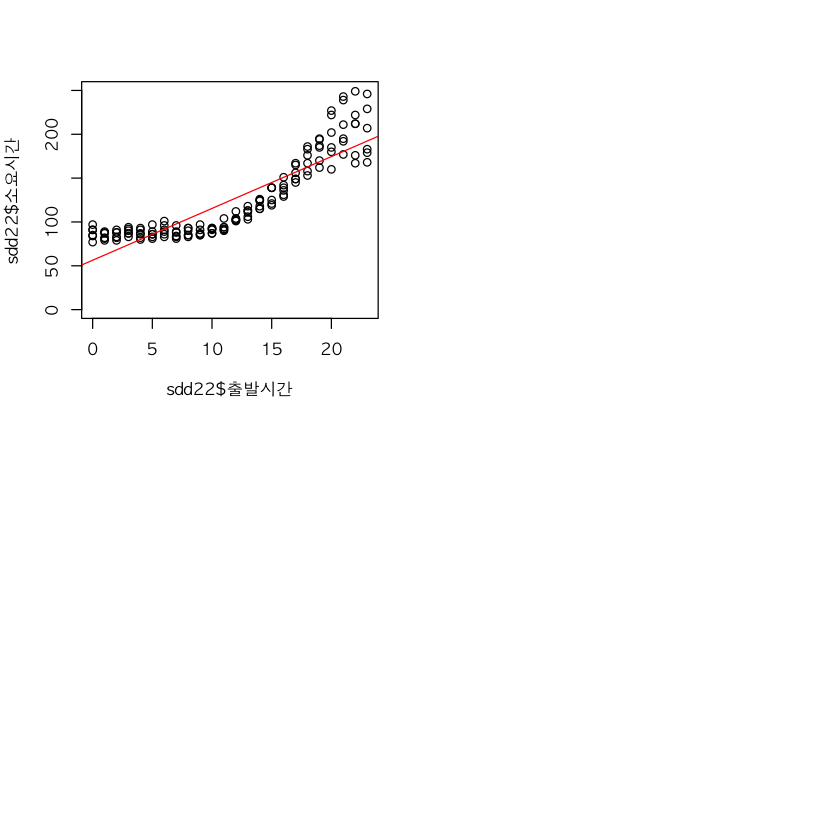

In [332]:
par(bg = 'white' , family = 'AppleGothic' , mfrow = c(2,2))
plot( sdd22$출발시간, sdd22$소요시간 , ylim=c(0,250))
r <- lm(sdd22$소요시간 ~ sdd22$출발시간) # 수식 , W = Y, H = X
abline(r, col='red')

#plot( day1$출발시간, sdd22$소요시간)
#r <- lm(day1$소요시간 ~ day1$출발시간) # 수식 , W = Y, H = X
#abline(r, col='red')

#plot( dday$출발시간, dday$소요시간)
#r <- lm(dday$소요시간 ~ dday$출발시간) # 수식 , W = Y, H = X
#abline(r, col='red')

In [261]:
sdd222 <- sdd22[,c(2:3,5:9)]

samp <- createDataPartition(sdd222$소요시간, p=0.7, list=F)
data.tr <- sdd222[samp,]
data.test <- sdd222[-samp,]

In [262]:
# training
model_tr <- lm(소요시간 ~ ., data=data.tr)
model_tr

# test
model_test <- lm(소요시간 ~ ., data=data.test)
model_test


Call:
lm(formula = 소요시간 ~ ., data = data.tr)

Coefficients:
   (Intercept)        출발시간        연휴길이        눈비TRUE     X1종.교통량  
-274.973963424     5.351866202    -1.463420593     4.092506529     0.000000446  
   X2종.교통량      서울인구수  
  -0.000026178     0.000034463  



Call:
lm(formula = 소요시간 ~ ., data = data.test)

Coefficients:
   (Intercept)        출발시간        연휴길이        눈비TRUE     X1종.교통량  
-252.882342854     4.229320600    -2.981081819    -7.239206535     0.000001371  
   X2종.교통량      서울인구수  
  -0.000037834     0.000034271  


In [263]:
cor(sdd222)

,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수,소요시간
출발시간,1.00000000,-0.061632903,-0.03694823,0.326662077,0.05725295,-0.06864429,0.89298169
연휴길이,-0.06163290,1.000000000,-0.50776074,-0.006256513,-0.09100884,-0.20525382,-0.08628695
눈비,-0.03694823,-0.507760736,1.00000000,-0.216265497,-0.09872634,0.27555100,0.03710757
X1종.교통량,0.32666208,-0.006256513,-0.21626550,1.000000000,0.71768746,-0.33712191,0.10600612
X2종.교통량,0.05725295,-0.091008838,-0.09872634,0.717687458,1.00000000,0.13539844,-0.22012812
서울인구수,-0.06864429,-0.205253821,0.27555100,-0.337121908,0.13539844,1.00000000,-0.01216095
소요시간,0.89298169,-0.086286952,0.03710757,0.106006120,-0.22012812,-0.01216095,1.00000000


In [264]:
reduced_tr <- step(model_tr, direction = "backward")
reduced_test <- step(model_test, direction = "backward")

Start:  AIC=501.42
소요시간 ~ 출발시간 + 연휴길이 + 눈비 + X1종.교통량 + 
    X2종.교통량 + 서울인구수

              Df Sum of Sq    RSS    AIC
- 연휴길이     1        50  15443 499.74
- 눈비         1       236  15629 500.89
<none>                      15393 501.42
- X1종.교통량  1       978  16371 505.34
- 서울인구수   1      1743  17136 509.72
- X2종.교통량  1      6448  21841 533.01
- 출발시간     1     85058 100451 679.50

Step:  AIC=499.74
소요시간 ~ 출발시간 + 눈비 + X1종.교통량 + X2종.교통량 + 
    서울인구수

              Df Sum of Sq    RSS    AIC
<none>                      15443 499.74
- 눈비         1       478  15921 500.66
- X1종.교통량  1      1022  16465 503.89
- 서울인구수   1      1836  17279 508.52
- X2종.교통량  1      6424  21867 531.13
- 출발시간     1     86809 102253 679.20
Start:  AIC=210.44
소요시간 ~ 출발시간 + 연휴길이 + 눈비 + X1종.교통량 + 
    X2종.교통량 + 서울인구수

              Df Sum of Sq     RSS    AIC
- 연휴길이     1      53.7  6059.3 208.79
<none>                      6005.6 210.44
- 눈비         1     317.3  6322.9 210.45
- 서울인구수   1     823.6  6829.2 213.45
- X1

In [265]:
reduced_tr
reduced_test


Call:
lm(formula = 소요시간 ~ 출발시간 + 눈비 + X1종.교통량 + 
    X2종.교통량 + 서울인구수, data = data.tr)

Coefficients:
    (Intercept)         출발시간         눈비TRUE      X1종.교통량  
-288.3015088827     5.3674960855     5.0367239974     0.0000004543  
    X2종.교통량       서울인구수  
  -0.0000261208     0.0000351354  



Call:
lm(formula = 소요시간 ~ 출발시간 + X1종.교통량 + 
    X2종.교통량 + 서울인구수, data = data.test)

Coefficients:
   (Intercept)        출발시간     X1종.교통량     X2종.교통량      서울인구수  
-237.243437238     4.279755628     0.000001284    -0.000036898     0.000031324  


In [266]:
summary(reduced_tr)


Call:
lm(formula = 소요시간 ~ 출발시간 + 눈비 + X1종.교통량 + 
    X2종.교통량 + 서울인구수, data = data.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.871  -7.126  -1.399   7.341  24.620 

Coefficients:
                   Estimate      Std. Error t value             Pr(>|t|)    
(Intercept) -288.3015088827  108.6586354530  -2.653              0.00942 ** 
출발시간       5.3674960855    0.2386358579  22.492 < 0.0000000000000002 ***
눈비TRUE       5.0367239974    3.0187847705   1.668              0.09870 .  
X1종.교통량    0.0000004543    0.0000001862   2.440              0.01663 *  
X2종.교통량   -0.0000261208    0.0000042691  -6.119         0.0000000241 ***
서울인구수     0.0000351354    0.0000107408   3.271              0.00152 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.1 on 90 degrees of freedom
Multiple R-squared:  0.8961,	Adjusted R-squared:  0.8903 
F-statistic: 155.2 on 5 and 90 DF,  p-value: < 0.00000000000000022


In [267]:
summary(reduced_test)


Call:
lm(formula = 소요시간 ~ 출발시간 + X1종.교통량 + 
    X2종.교통량 + 서울인구수, data = data.test)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.0188  -8.8223   0.6443   7.4918  25.6900 

Coefficients:
                   Estimate      Std. Error t value        Pr(>|t|)    
(Intercept) -237.2434372379  162.6973512985  -1.458        0.153965    
출발시간       4.2797556276    0.4482187552   9.548 0.0000000000376 ***
X1종.교통량    0.0000012842    0.0000005966   2.153        0.038536 *  
X2종.교통량   -0.0000368981    0.0000084532  -4.365        0.000112 ***
서울인구수     0.0000313238    0.0000161357   1.941        0.060551 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.64 on 34 degrees of freedom
Multiple R-squared:  0.8891,	Adjusted R-squared:  0.8761 
F-statistic: 68.15 on 4 and 34 DF,  p-value: 0.0000000000000009341


In [269]:
samp <- createDataPartition(sdd222$출발시간, p=0.7, list=F)
data.tr <- sdd222[samp,]
data.test <- sdd222[-samp,]

x <- subset(data.test, select = -소요시간)
y <- data.test$소요시간

x.tr <- subset(data.tr, select = -소요시간)
y.tr <- data.tr$소요시간

model <- lm(소요시간 ~ . , data = data.tr)
model <- step(model, direction = 'backward')

pred <- predict(model, x)
pred.tr <- predict(model, x.tr)


Start:  AIC=505.29
소요시간 ~ 출발시간 + 연휴길이 + 눈비 + X1종.교통량 + 
    X2종.교통량 + 서울인구수

              Df Sum of Sq    RSS    AIC
- 눈비         1       227  16254 504.64
<none>                      16026 505.29
- 연휴길이     1       602  16628 506.83
- X1종.교통량  1       997  17023 509.09
- 서울인구수   1      1663  17689 512.77
- X2종.교통량  1      7634  23660 540.69
- 출발시간     1     89384 105410 684.12

Step:  AIC=504.64
소요시간 ~ 출발시간 + 연휴길이 + X1종.교통량 + 
    X2종.교통량 + 서울인구수

              Df Sum of Sq    RSS    AIC
<none>                      16254 504.64
- 연휴길이     1       383  16637 504.88
- X1종.교통량  1       991  17244 508.33
- 서울인구수   1      1501  17755 511.13
- X2종.교통량  1      7413  23667 538.72
- 출발시간     1     90053 106306 682.93


In [270]:
summary(model)


Call:
lm(formula = 소요시간 ~ 출발시간 + 연휴길이 + X1종.교통량 + 
    X2종.교통량 + 서울인구수, data = data.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.952  -9.195  -1.262   8.547  22.891 

Coefficients:
                   Estimate      Std. Error t value             Pr(>|t|)    
(Intercept) -210.2665984868  106.1018845702  -1.982              0.05056 .  
출발시간       5.0952355561    0.2281750299  22.330 < 0.0000000000000002 ***
연휴길이      -3.4970546327    2.4003817541  -1.457              0.14863    
X1종.교통량    0.0000004948    0.0000002112   2.342              0.02137 *  
X2종.교통량   -0.0000296046    0.0000046207  -6.407        0.00000000664 ***
서울인구수     0.0000297192    0.0000103077   2.883              0.00492 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.44 on 90 degrees of freedom
Multiple R-squared:  0.8948,	Adjusted R-squared:  0.889 
F-statistic: 153.1 on 5 and 90 DF,  p-value: < 0.00000000000000022


# 진짜 머신러닝

In [373]:
sdd22 <- read.csv("../Data_Project/AI프로젝트 - D-2-2.csv")
sdd22 <- subset(sdd22, 소요시간 <= 220 & !(출발시간 == 0 & 소요시간 == 97))
nrow(sdd22)
table(sdd22$소요시간범위)

[1] 135


 A  B  C  D 
35 36 36 28 

In [374]:


sdd22 <- sdd22[,-4]
head(sdd22)

소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수,소요시간
B,0,3,TRUE,3793419,229419,10388055,91
B,1,3,TRUE,2514790,203047,10388055,88
B,2,3,TRUE,1846564,235137,10388055,88
A,3,3,TRUE,1632415,305994,10388055,87
B,4,3,TRUE,2247045,444384,10388055,91
B,5,3,TRUE,5186824,774325,10388055,97


In [364]:
# 다중 회귀
model <- lm(소요시간 ~ ., data = sdd22[,-1])       # 전체 컬럼으로 모델 생성, 소요시간범위,날짜 컬럼은 제거해야함@
reduced <- step(model, direction = "backward")   # 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거
summary(reduced)
reduced                                          # 얘가 알려주는 컬럼으로 분석하면 된다


Start:  AIC=708.04
소요시간 ~ 출발시간 + 연휴길이 + 눈비 + X1종.교통량 + 
    X2종.교통량 + 서울인구수

              Df Sum of Sq    RSS    AIC
- 눈비         1         4  23074 706.06
- 연휴길이     1       184  23254 707.11
<none>                      23070 708.04
- X1종.교통량  1      1515  24585 714.63
- 서울인구수   1      2661  25731 720.77
- X2종.교통량  1     10301  33371 755.87
- 출발시간     1    119331 142401 951.75

Step:  AIC=706.06
소요시간 ~ 출발시간 + 연휴길이 + X1종.교통량 + 
    X2종.교통량 + 서울인구수

              Df Sum of Sq    RSS    AIC
- 연휴길이     1       281  23355 705.69
<none>                      23074 706.06
- X1종.교통량  1      1512  24585 712.63
- 서울인구수   1      2743  25817 719.23
- X2종.교통량  1     10373  33446 754.18
- 출발시간     1    119368 142442 949.79

Step:  AIC=705.69
소요시간 ~ 출발시간 + X1종.교통량 + X2종.교통량 + 
    서울인구수

              Df Sum of Sq    RSS    AIC
<none>                      23355 705.69
- X1종.교통량  1      1535  24890 712.29
- 서울인구수   1      3122  26477 720.63
- X2종.교통량  1     10316  33670 753.08
- 출발시간     1    120417 


Call:
lm(formula = 소요시간 ~ 출발시간 + X1종.교통량 + 
    X2종.교통량 + 서울인구수, data = sdd22[, -1])

Residuals:
    Min      1Q  Median      3Q     Max 
-27.812  -8.507  -1.409   8.735  26.505 

Coefficients:
                   Estimate      Std. Error t value             Pr(>|t|)    
(Intercept) -295.7972648266   88.5699667097  -3.340              0.00109 ** 
출발시간       5.1242125100    0.1979238524  25.890 < 0.0000000000000002 ***
X1종.교통량    0.0000004903    0.0000001677   2.923              0.00409 ** 
X2종.교통량   -0.0000284931    0.0000037602  -7.578     0.00000000000585 ***
서울인구수     0.0000364797    0.0000087507   4.169     0.00005552664500 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.4 on 130 degrees of freedom
Multiple R-squared:  0.8865,	Adjusted R-squared:  0.883 
F-statistic: 253.8 on 4 and 130 DF,  p-value: < 0.00000000000000022



Call:
lm(formula = 소요시간 ~ 출발시간 + X1종.교통량 + 
    X2종.교통량 + 서울인구수, data = sdd22[, -1])

Coefficients:
    (Intercept)         출발시간      X1종.교통량      X2종.교통량  
-295.7972648266     5.1242125100     0.0000004903    -0.0000284931  
     서울인구수  
   0.0000364797  


In [365]:
day2amL <- sdd22[,c(1:2,5:8)]                     # 원 데이터 day1am에서 reduced가 알려준 컬럼만 추리기
head(day2amL)

소요시간범위,출발시간,X1종.교통량,X2종.교통량,서울인구수,소요시간
B,0,3793419,229419,10388055,91
B,1,2514790,203047,10388055,88
B,2,1846564,235137,10388055,88
A,3,1632415,305994,10388055,87
B,4,2247045,444384,10388055,91
B,5,5186824,774325,10388055,97


In [366]:
#---

# 학습시키고 예측하기
samp <- createDataPartition(day2amL$소요시간범위, p=0.7, list=F) # 컬럼 추린 데이터로 샘플링
data.tr <- day2amL[samp,]
data.tr<-data.tr[,-1]
head(data.tr)
data.test <- day2amL[-samp,]
data.test<-data.test[,-1]
head(data.test)

출발시간,X1종.교통량,X2종.교통량,서울인구수,소요시간
0,3793419,229419,10388055,91
1,2514790,203047,10388055,88
2,1846564,235137,10388055,88
3,1632415,305994,10388055,87
4,2247045,444384,10388055,91
5,5186824,774325,10388055,97


,출발시간,X1종.교통량,X2종.교통량,서울인구수,소요시간
8,7,15984740,1349972,10388055,89
9,8,17462577,1624836,10388055,90
28,3,1560879,263359,10369593,83
32,7,15221692,1225733,10369593,84
38,13,20755272,1433045,10369593,113
40,15,22353936,1379857,10369593,139


In [367]:


# 모델만들기
model_tr <- lm(소요시간 ~ . , data = data.tr) # 추린 컬럼으로 만든 학습용 모델

# 트레이닝 데이터 훈련
x_tr <- subset(data.tr, select = -소요시간)
y_tr <- data.tr$소요시간
    
# 테스트 데이터 훈련  
x_test <- subset(data.test, select = -소요시간)
y_test <- data.test$소요시간

# 문제 맞추기
predicted <- predict(model_tr, x_test) # 정답 예측
correct <- y_test # 정답

cbind(predicted ,  y_test) # 예측값과 정답 한번에 보기

summary(model_tr) # 학습용 모델의 정확도와 평균 표준 오차 확인

,predicted,y_test
8,88.31950,89
9,85.45914,90
28,92.53331,83
32,90.93312,84
38,118.60190,113
40,131.65264,139
41,141.53326,142
53,92.67134,82
54,91.26546,83
56,92.38019,96



Call:
lm(formula = 소요시간 ~ ., data = data.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.010  -7.477  -2.061  10.078  26.941 

Coefficients:
                   Estimate      Std. Error t value             Pr(>|t|)    
(Intercept) -432.0628635574  104.9263704815  -4.118      0.0000834184185 ***
출발시간       5.1031280361    0.2223136415  22.955 < 0.0000000000000002 ***
X1종.교통량    0.0000006916    0.0000001880   3.679             0.000394 ***
X2종.교통량   -0.0000326912    0.0000042337  -7.722      0.0000000000136 ***
서울인구수     0.0000498396    0.0000103309   4.824      0.0000055488520 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.41 on 92 degrees of freedom
Multiple R-squared:  0.8922,	Adjusted R-squared:  0.8875 
F-statistic: 190.3 on 4 and 92 DF,  p-value: < 0.00000000000000022


In [368]:
# sum_rf <- 0
# sum_nnet <- 0
# sum_ctree <- 0
# sum_multi <- 0
# sum_svm <- 0

# sum_rf_tr <- 0
# sum_ctree_tr <- 0
# sum_svm_tr <- 0
# sum_multi_tr <- 0
# sum_nnet_tr <- 0

# # samp <- createDataPartition(day2amL$소요시간, p=0.7, list=F)
# # data.tr <- day2amL[samp,]
# # data.test <- day2amL[-samp,]

# for (i in 1:100){
# #    # 트레이닝 데이터 훈련
# #   x_tr <- subset(data.tr, select = -소요시간)
# #   y_tr <- data.tr$소요시간
    
# #   # 테스트 데이터 훈련  
# #   x_test <- subset(data.test, select = -소요시간)
# #   y_test <- data.test$소요시간 
    
#   # RF
#   model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
#   pred_rf <- predict(model_rf, x_test)
#   예측력_rf <- 1 - (sum((y_test - pred_rf)^2) / sum((y_test - mean(y_test))^2))
#   # RF train
#   model_rf_tr <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
#   pred_rf_tr <- predict(model_rf_tr, x_tr)
#   예측력_rf_tr <- 1 - (sum((y_tr - pred_rf_tr)^2) / sum((y_tr - mean(y_tr))^2))
  
# #   인공신경망
# #   model_nnet <- nnet(소요시간 ~ ., data=data.tr, size=3, trace=FALSE)
# #   pred_nnet <- predict(model_nnet, x_test, type="class")
# #   예측력_nnet <- mean(pred_nnet == y_test)
# #   인공신경망 train
# #   model_nnet_tr <- nnet(소요시간 ~ ., data=data.tr, size=3, trace=FALSE)
# #   pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
# #   예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
#   # 의사결정나무
#   model_ctree <- ctree(소요시간 ~ ., data=data.tr)
#   pred_ctree <- predict(model_ctree, x_test)
#   예측력_nnet <- 1 - (sum((y_test - pred_ctree)^2) / sum((y_test - mean(y_test))^2))
#   # 의사결정나무 train
#   model_ctree_tr <- ctree(소요시간 ~ ., data=data.tr)
#   pred_ctree_tr <- predict(model_ctree_tr, x_tr)
#   예측력_ctree_tr <- 1 - (sum((y_tr - pred_ctree_tr)^2) / sum((y_tr - mean(y_tr))^2))
    
#   # SVM test
#   model_svm <- svm(소요시간 ~ ., data=data.tr)
#   pred_svm <- predict(model_svm, x_test, type = "raw")
#   예측력_svm <- 1 - (sum((y_test - pred_svm)^2) / sum((y_test - mean(y_test))^2))
#   # SVM train
#    model_svm_tr <- svm(소요시간 ~ ., data=data.tr)
#    pred_svm_tr <- predict(model_svm_tr, x_tr, type = "raw")
#    예측력_svm_tr <- 1 - (sum((y_tr - pred_svm_tr)^2) / sum((y_tr - mean(y_tr))^2))
    
# #   # 다항 로지스틱 회귀분석
# #    model_multinom <- multinom(소요시간 ~ ., data=data.tr, trace=FALSE)
# #    pred_multinom <- predict(model_multinom, x_test, type="class")
# #    예측력_multinom <- 1 - (sum((y_test - pred_multinom)^2) / sum((y_test - mean(y_test))^2))
# #   # 다항 로지스틱 회귀분석 train
# #     model_multinom_tr <- multinom(소요시간 ~ ., data=data.tr, trace=FALSE)
# #     pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
# #     예측력_multinom_tr <- 1 - (sum((y_tr - pred_multinom_tr)^2) / sum((y_tr - mean(y_tr))^2))
    
#   sum_rf <- sum_rf + 예측력_rf
#   sum_ctree <- sum_ctree + 예측력_nnet
#   sum_svm <- sum_svm + 예측력_svm
#   sum_multi <- sum_multi + 예측력_multinom
#   sum_nnet <- sum_nnet + 예측력_nnet
    
#   sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
#   sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
#   sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
#   sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
#   sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
# }
# cat("Test Data \n")
# cat("랜덤 포레스트 : ", sum_rf, "\n")
# cat("의사결정나무 : ", sum_ctree, "\n")
# cat("SVM :  ", sum_svm, "\n")
# # cat("다항 로지스틱 :  ", sum_multi, "\n")
# # cat("인공신경망 :  ", sum_nnet, "\n")

# cat("------------------------", "\n")
# cat("Training Data \n")
# cat("랜덤 포레스트 : ", sum_rf_tr, "\n")
# cat("의사결정나무 : ", sum_ctree_tr, "\n")
# cat("SVM :  ", sum_svm_tr, "\n")
# # cat("다항 로지스틱 :  ", sum_multi_tr, "\n")
# # cat("인공신경망 :  ", sum_nnet_tr, "\n")